# Homework 7
## CEWA 565
## Daniel Hogan



---

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

# SVD function from scipy
from scipy.linalg import svd

# we'll use scipy's IO library and datetime to read .mat files
import scipy.io as sio 
import datetime as dt

---
### Optional:

We can use the [geopandas](https://geopandas.org/) python package to plot our data with a map of the watershed.

Since we don't have geopandas installed on our JupyterHub by default, the first time you run this notebook, you'll need to install the geopandas into our python envrionment.

**Run the cell below once.** Uncomment it now, so that it reads `!pip install geopandas`, and run it. It will install geopandas on your JupyterHub. You shouldn't need to re-run it next time you open this notebook, so it's best to comment it out again when it completes.

When it is complete and you've commented it back out, restart the kernel by going to *Kernel* > *Researt Kernel*.

In [2]:
#!pip install geopandas

To help us make some maps, we are going to use geopandas to load this geojson file that has polyons for the US states from the census bureau.

In [3]:
# for plotting map figures and working with geospatial data, see installation step above
import geopandas as gpd 

In [4]:
watershed = gpd.read_file('North_Fork_American_River_CA_18020128.json')

To plot:

<AxesSubplot:>

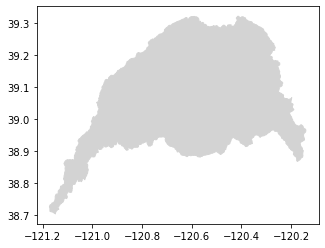

In [5]:
# plot the watershed shapefile
watershed.plot(linestyle='-', edgecolor='lightgrey', color='lightgrey')

***
## Problem 1:
#### **Load iButton air temperature data**
Unpack the mat file into numpy arrays, format dates to python datetimes following the method outlined [here](https://sociograph.blogspot.com/2011/04/how-to-avoid-gotcha-when-converting.html).

A. Plot the temperature observations (AIR_TEMPERATURE) at all sites on one plot over time; use the title, xlabel, and ylabel commands to label your plot and its axes. Use xlim to zoom in and examine the data at finer scales. Qualitatively describe the dataset, including its minimum and maximum values, its major variability in time, and how correlated the stations appear to be with one another. (you do not need to actually compute correlation coefficents here, just describe it qualitatively)


In [2]:
# load the ibutton data
data = sio.loadmat('iButtons_2008-2010.mat')
# convert matlab format dates to python datetimes
datenums = data['TIME'][:,0]
dates = [dt.datetime.fromordinal(int(d)) + dt.timedelta(days=d%1) - dt.timedelta(days = 366) for d in datenums]

# Unpack the rest of the data
SITE_NAMES = [name[0][0] for name in data['SITE_NAMES']]
SITE_LATS = data['SITE_LATS'][:,0]
SITE_LONS = data['SITE_LONS'][:,0]
SITE_ELEVS = data['SITE_ELEVS'][:,0]
AIR_TEMPERATURE = data['AIR_TEMPERATURE']
AIR_TEMPERATURE_ZEROMEAN = data['AIR_TEMPERATURE_ZEROMEAN']

nt = data['nt'][0][0] # size in the t dimension
nx = data['nx'][0][0] # size in the x dimension (number of sites)

In [7]:
print(data['nt'])

[[24691]]


#### **Plot a timseries for a single site**
Note: use plt.xlim to set x axis limits to "zoom in" to a smaller time period

In [4]:
# Reference 1: code adapted from https://stackoverflow.com/questions/14313510/how-to-calculate-rolling-moving-average-using-python-numpy-scipy
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

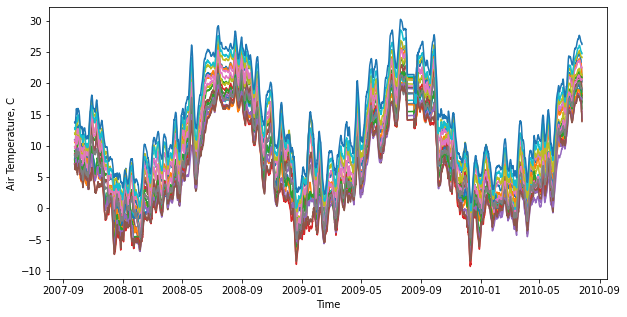

In [8]:
site = 0 # plot the first site of 21
plt.figure(figsize=(10,5))
temps = {}
for site in range(len(SITE_NAMES)):

    plt.plot(dates[167:],moving_average(AIR_TEMPERATURE[:,site],24*7),label=SITE_NAMES[site]) # week long temperature rolling average
    plt.ylabel('Air Temperature, C')
    plt.xlabel('Time');
    temps[site]={'max':max(AIR_TEMPERATURE[:,site]), 'min':min(AIR_TEMPERATURE[:,site])}

# use xlim to set x axis limits to zoom in
# comment xlim out to plot the entire timeseries
#plt.xlim((dates[100], dates[500])); 


In [21]:
temps

{0: {'max': 40.0, 'min': -8.455928299659814},
 1: {'max': 40.0, 'min': -11.46},
 2: {'max': 37.78177213103664, 'min': -11.53},
 3: {'max': 40.0, 'min': -13.501},
 4: {'max': 37.44174726255183, 'min': -14.363581808061056},
 5: {'max': 37.526750848119136, 'min': -14.384654602817188},
 6: {'max': 37.159958078517356, 'min': -9.443929999910296},
 7: {'max': 40.0, 'min': -15.598},
 8: {'max': 39.082921372286975, 'min': -12.042},
 9: {'max': 38.719150019898876, 'min': -14.501},
 10: {'max': 40.0, 'min': -17.066},
 11: {'max': 38.16137722142413, 'min': -18.602},
 12: {'max': 33.12394531924418, 'min': -16.528},
 13: {'max': 34.34778739354308, 'min': -25.0},
 14: {'max': 33.617473331376914, 'min': -17.535},
 15: {'max': 33.11691815253205, 'min': -22.14785944473563},
 16: {'max': 35.16837597142253, 'min': -12.258228123476325},
 17: {'max': 35.558690829931955, 'min': -14.066},
 18: {'max': 38.648930833244755, 'min': -9.967860555376857},
 19: {'max': 40.0, 'min': -10.01385972251283},
 20: {'max': 4

These data follow a strong annual trend where air temperature increases throughout the warmer, summer months and decreases into the winter winter. This is apparent throughout all locations. Maximum temperatures all appear to be between 33-40 degrees C, but it does look like 40 degrees is the max temperature that is able to be read by the sensors. The minimum temperatures are all between -8 and -22 degrees C, so there is a decent amount of variability between locations.

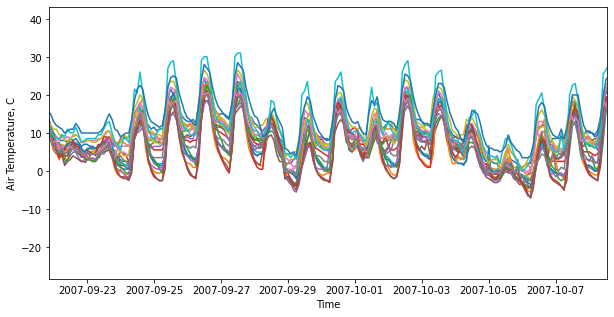

In [9]:
site = 0 # plot the first site of 21

plt.figure(figsize=(10,5))
for site in range(len(SITE_NAMES)):

    plt.plot(dates,AIR_TEMPERATURE[:,site],label=SITE_NAMES[site])
    plt.ylabel('Air Temperature, C')
    plt.xlabel('Time');

# use xlim to set x axis limits to zoom in
# comment xlim out to plot the entire timeseries
plt.xlim((dates[100], dates[500])); 


A diurnal trend is also visible with peak temperatures during the day and minimum temperatures at night. All locations follow this cycle. Since all locations follow these annual and diurnal cycles, there is strong correlation between each site.

#### **Decompose the entire dataset using SVD**

**B. Use the command: [U,S,V] = scipy.linalg.svd(AIR_TEMPERATURE_ZEROMEAN, full_matrices=False) (read the documentation for this function here) to calculate the PCs, variances, and EOFs, respectively, of AIR_TEMPERATURE_ZEROMEAN (this is a version of the dataset where the mean temperature at each station has been subtracted out). Describe, qualitatively, how the variance is distributed among the patterns; how much is described by the leading pattern? By the second pattern?**

In [10]:
def make_map(X, n, nx, ny):
    # create an empty np array full of NaN values, that's the correct length for our 2D data
    a = np.full(n, np.nan)
    # use the map_index to arrange data values from this selected month into array "a"
    a[map_index] = X
    # reshape "a" into a 2D array of the correct shape
    b = a.reshape([nx, ny]).T
    # return our 2D map
    return b

In [11]:
[U,S,V] = svd(AIR_TEMPERATURE_ZEROMEAN, full_matrices=False)

In [28]:
print('Variance explained by leading patterm {}%'.format(np.round(100*S[0]/sum(S),2)))
print('Variance explained by secondary patterm {}%'.format(np.round(100*S[1]/sum(S),2)))

Variance explained by leading patterm 54.16%
Variance explained by secondary patterm 9.31%


In [64]:
# SVD Variance Explained, divide S values by the sum of all S
var_exp = S / np.sum(S)

The leading pattern explains approximately 54% and the secondary pattern approximately 9% of the variance. The figure below visualizes how the variance changes with each EOF.

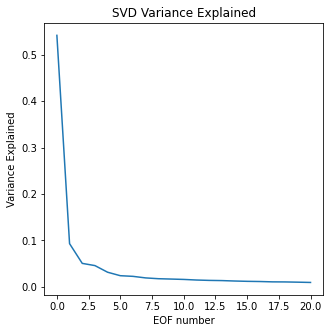

In [65]:
plt.figure(figsize=(5,5))
plt.plot(var_exp)
plt.xlabel('EOF number')
plt.ylabel('Variance Explained')
plt.title('SVD Variance Explained');

**C. Plot the leading pattern's spatial weights (EOF) against latitude and longitude. Describe the first pattern's spatial weights' sign and variability.** Here the spatial weights represent the $V^T$ matrix, as the dimensions are that of space, so I will represent these with the $V$ matrix.

Plot the first leading pattern of spatial weights (EOF) against latitude and longitude on a map.

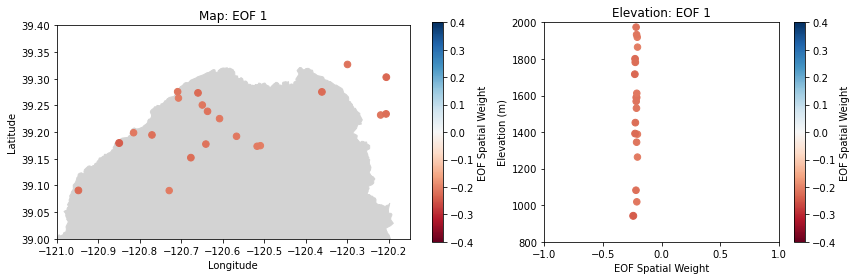

In [16]:
i = 0 # select the first EOF

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,4), gridspec_kw={'width_ratios': [3, 2]}, tight_layout=True)

# OPTIONAL plot the watershed shapefile
watershed.plot(linestyle='-', edgecolor='lightgrey', color='lightgrey', ax=ax[0])

# Make a scatter plot
points = ax[0].scatter(SITE_LONS,SITE_LATS,     # use longitude and latitude as the x and y values
                       c=V[i,:],                # set the color map value from V
                       s=np.abs(V[i,:]*200),    # also set the size of the marker from abs(V) (x200 to make it easier to see)
                       marker='o',cmap='RdBu',  # select marker type and color map
                       vmin=-0.4,vmax=0.4)      # set min and max for color map values

# Add labels and format the scatterplot
plt.colorbar(points, label='EOF Spatial Weight', ax=ax[0]) # add a colorbar and label it
ax[0].set_title('Map: EOF {}'.format(i+1)) # add a title
ax[0].set_xlabel('Longitude') # x axis label
ax[0].set_ylabel('Latitude'); # y axis label

# set up axes limits to zoom in to our points
ax[0].set_xlim((-121, -120.15))
ax[0].set_ylim((39.0,39.4))

# Plot EOF value versus elevation
points = ax[1].scatter(V[i,:],SITE_ELEVS,     # use longitude and latitude as the x and y values
                       c=V[i,:],                # set the color map value from V
                       s=np.abs(V[i,:]*200),    # also set the size of the marker from abs(V) (x200 to make it easier to see)
                       marker='o',cmap='RdBu',  # select marker type and color map
                       vmin=-0.4,vmax=0.4)      # set min and max for color map values

# Add labels and format the scatterplot
plt.colorbar(points, label='EOF Spatial Weight', ax=ax[1]) # add a colorbar and label it
ax[1].set_title('Elevation: EOF {}'.format(i+1)) # add a title
ax[1].set_xlabel('EOF Spatial Weight') # x axis label
ax[1].set_ylabel('Elevation (m)'); # y axis label

# set up axes limits to zoom in to our points
ax[1].set_xlim((-1, 1))
ax[1].set_ylim((800,2000));

These spatial weights all appear to be negative and seem to vary little in x,y, and z space. 

**D. Plot the leading pattern's temporal weights (PCs) over time. When are they positive and when are they negative? Consider the PCs' sign and magnitude, and consider the sign of the EOF in Part C. When does this pattern generate warmer-than-normal temperatures? Colder-thannormal temperatures? Are the anomalies associated with this pattern of the same sign at all sites?**

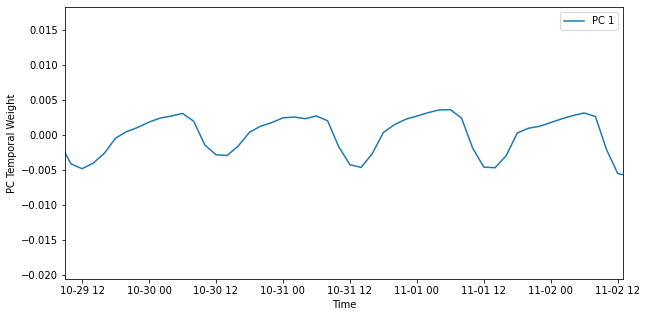

In [33]:
i = 0 # select the first PC

plt.figure(figsize=(10,5))
plt.plot(dates,U[:,i],
         label='PC {}'.format(i+1))
plt.xlim((dates[1000], dates[1100]))
plt.legend()
plt.ylabel('PC Temporal Weight')
plt.xlabel('Time');

The temporal weight PCs are negative during the day and positive at night, this seems to show the diurnal trend in temperature. Since the EOFs are all negative, when the PCs are negative (during the day) the temperature everywhere is higher than normal. When the PCs are positive (during the night) the temperature everywhere is less than normal. This caputures the diurnal cycle of temperature and is ubiquitous in space. 

**E.
Repeat C) and D) for the 2nd-leading pattern. Interpret physically what the first two patterns may represent. How much of the dataset is described by the first two modes of variability?**

In [57]:
states_url = 'http://eric.clst.org/assets/wiki/uploads/Stuff/gz_2010_us_040_00_5m.json'
states_gdf = gpd.read_file(states_url)

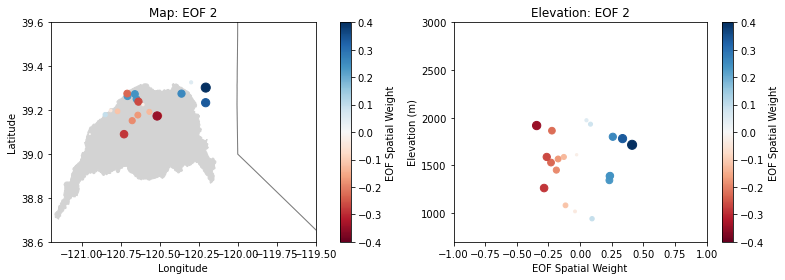

In [67]:
i = 1 # select the first EOF

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,4), gridspec_kw={'width_ratios': [3, 2]}, tight_layout=True)

# OPTIONAL plot the watershed shapefile
watershed.plot(linestyle='-', edgecolor='lightgrey', color='lightgrey', ax=ax[0])
states_gdf.plot(ax=ax[0], facecolor='none', edgecolor='k', alpha=0.3)
# Make a scatter plot
points = ax[0].scatter(SITE_LONS,SITE_LATS,     # use longitude and latitude as the x and y values
                       c=V[i,:],                # set the color map value from V
                       s=np.abs(V[i,:]*200),    # also set the size of the marker from abs(V) (x200 to make it easier to see)
                       marker='o',cmap='RdBu',  # select marker type and color map
                       vmin=-0.4,vmax=0.4)      # set min and max for color map values

# Add labels and format the scatterplot
plt.colorbar(points, label='EOF Spatial Weight', ax=ax[0]) # add a colorbar and label it
ax[0].set_title('Map: EOF {}'.format(i+1)) # add a title
ax[0].set_xlabel('Longitude') # x axis label
ax[0].set_ylabel('Latitude'); # y axis label

# set up axes limits to zoom in to our points
ax[0].set_xlim((-121.2, -119.5))
ax[0].set_ylim((38.6,39.6))

# Plot EOF value versus elevation
points = ax[1].scatter(V[i,:],SITE_ELEVS,     # use longitude and latitude as the x and y values
                       c=V[i,:],                # set the color map value from V
                       s=np.abs(V[i,:]*200),    # also set the size of the marker from abs(V) (x200 to make it easier to see)
                       marker='o',cmap='RdBu',  # select marker type and color map
                       vmin=-0.4,vmax=0.4)      # set min and max for color map values

# Add labels and format the scatterplot
plt.colorbar(points, label='EOF Spatial Weight', ax=ax[1]) # add a colorbar and label it
ax[1].set_title('Elevation: EOF {}'.format(i+1)) # add a title
ax[1].set_xlabel('EOF Spatial Weight') # x axis label
ax[1].set_ylabel('Elevation (m)'); # y axis label

# set up axes limits to zoom in to our points
ax[1].set_xlim((-1, 1))
ax[1].set_ylim((700,3000));

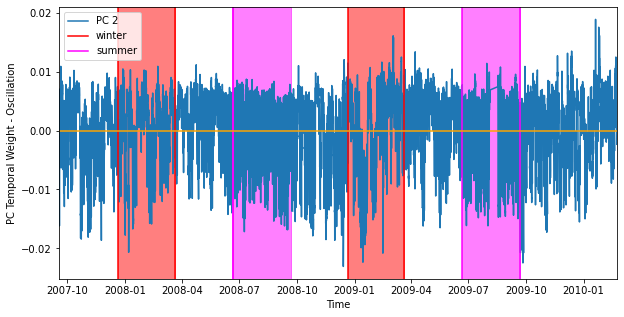

In [84]:
i = 1 # select the 2nd PC
import datetime
plt.figure(figsize=(10,5))
plt.plot(dates,U[:,i],
         label='PC {}'.format(i+1))
plt.xlim((dates[0], dates[21000]))
plt.axvline(datetime.date(2008,12,21), color = 'red', label='winter')
plt.axvline(datetime.date(2009,3,21), color = 'red')
plt.axvspan(datetime.date(2008,12,21),datetime.date(2009,3,21), alpha=0.5,color='r')
plt.axvline(datetime.date(2007,12,21), color = 'red')
plt.axvline(datetime.date(2008,3,21), color = 'red')
plt.axvspan(datetime.date(2007,12,21),datetime.date(2008,3,21), alpha=0.5,color='r')
plt.axvline(datetime.date(2008,6,21), color = 'magenta', label='summer')
plt.axvline(datetime.date(2008,6,21), color = 'magenta')
plt.axvspan(datetime.date(2008,6,21),datetime.date(2008,9,21), alpha=0.5,color='magenta')
plt.axvline(datetime.date(2009,6,21), color = 'magenta')
plt.axvline(datetime.date(2009,9,21), color = 'magenta')
plt.axvspan(datetime.date(2009,6,21),datetime.date(2009,9,21), alpha=0.5,color='magenta')
plt.axhline(0, color = 'orange')
plt.legend()
plt.ylabel('PC Temporal Weight - Oscillation')
plt.xlabel('Time');


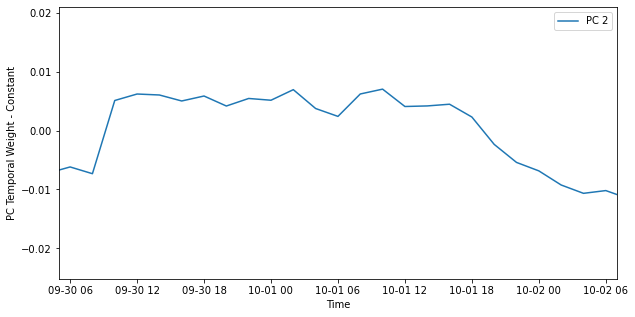

In [52]:
i = 1 # select the 2nd PC

plt.figure(figsize=(10,5))
plt.plot(dates,U[:,i],
         label='PC {}'.format(i+1))
plt.xlim((dates[300], dates[350]))
plt.legend()
plt.ylabel('PC Temporal Weight - Constant')
plt.xlabel('Time');

The first two modes of variability represent approximately 64% of the dataset. The first mode appears to represent the diurnal cycle of temperature. The second mode is a bit more difficult to pull out. It does not appear to be directly related to elevation, as the EOFs plotted with elevation are somewhat symmetric around 0. Spatially, there does appear to be a northeast/southwest variation in the sign of the EOFs. The northeastern most sites are positive, while the southwestern-most sites are negative. The PC temporal weights don't appear to show any discernable trends, but there does seem to be periods of strong diurnal oscillation (as shown above) and others where the temporal weight is somewhat constant. These two weight trends can occur in close proximity to one other. Given this information, perhaps this variability is representing the west-east movement of weather systems into the Sierra. Since this watershed is all on the western slope of the Sierra, we are not getting a difference in temperature from the east side/west side temperature differences, but this second mode could be capturing the change in temperature as different weather systems move into the Sierra. Most of the north-eastern locations are negative, so when the temportal weight is positive, the temperature is less than normal, but greater than normal for the eastern locations. After writing this, I'm not so confident in this answer...

Another option could be due to snowfall in the Sierra. Temporal weights appear to be less variable in the winter months, meaning the northeastern locations (wear more snow would presumably fall) maintain a negative value during winter, while the positive values would not have this same effect if no snow fell. 

## Problem 2

Following lab 8-2, use Fourier Analysis to determine the dominant frequencies and periods of oscilliation of the water level data provided (waterlevel.mat). Based on what you find, where (in what type of environment) do you think this water level was measured?


In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

# we'll use scipy's IO library to read .mat files
import scipy.io as sio 

In [2]:
data = sio.loadmat('waterlevel.mat')

In [32]:
time = data['t'][0] # time, in days
level = data['Level'][0] # water level data, in cm
N = data['N'][0][0] # number of data points
sf = data['sf'][0][0] # sampling frequency, in hours

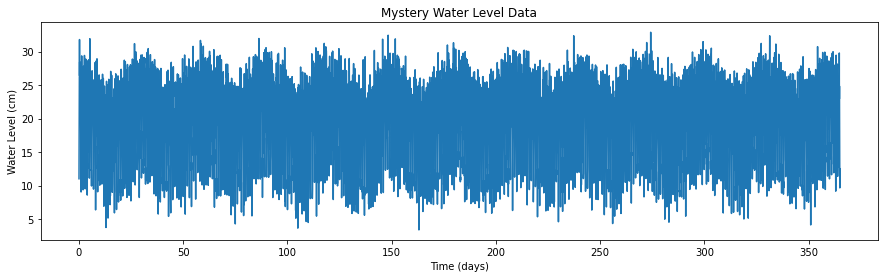

In [33]:
plt.figure(figsize=(15,4))
plt.plot(time,level)
plt.xlabel('Time (days)')
plt.ylabel('Water Level (cm)')
plt.title('Mystery Water Level Data');

In [28]:
# Now let's take what we learned and apply it to the timeseries we made up earlier.
print(sf)

24


In [46]:
# fft of Qsum
Cns = np.fft.fft(level)
recoveredmean = Cns[0]/N

In [45]:
# Note that in the prior cases we only sampled a period from 0 to 1
# now we have to define our frequencies

f = np.linspace(0,(N/2),N) * (sf/N)
a = np.zeros_like(Cns)
b = np.zeros_like(Cns)
for n in range(1,int(N/2+1)): # values are offset by one because the first one has the mean (no sine or cosine)
    a[n-1] = -Cns[n].imag / (N/2) # sine coefficients
    b[n-1] = Cns[n].real / (N/2)  # cosine coefficients

/opt/conda/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/opt/conda/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0, 0.5, 'values (same as input)')

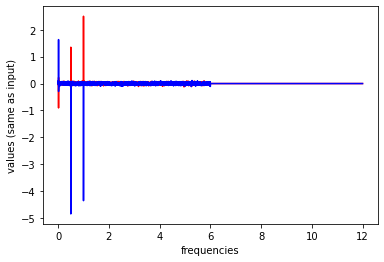

In [47]:
plt.figure()

plt.plot(f,a,'r',label='sine coefficients')
plt.plot(f,b,'b',label='cosine coefficients')

plt.xlabel('frequencies')
plt.ylabel('values (same as input)')

/opt/conda/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/opt/conda/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


(-1.5, 1.5)

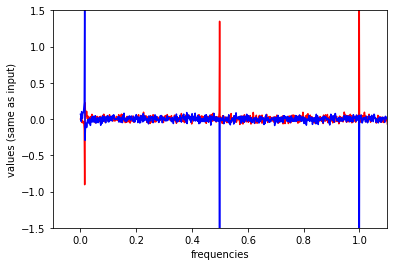

In [10]:
plt.figure()

plt.plot(f,a,'r',label='sine coefficients')
plt.plot(f,b,'b',label='cosine coefficients')

plt.xlabel('frequencies')
plt.ylabel('values (same as input)')
plt.xlim((-0.1,1.1)) # zoom in here
plt.ylim(-1.5,1.5)

In [15]:
winsize = 8760 # I chose this as 1/4th of a year sampled hourly, but you could change, just be even
nwin = np.floor(N/winsize)
xx = np.reshape(level,(int(winsize),int(nwin)),order='F')

In [16]:
def power_spectral_density(x, sf):
    # perform fft on x
    f = np.fft.fft(x)
    
    # take absolute value to "fold over" power for PSD (but only take the first half, positive frequencies)
    p = np.abs(f[:f.size//2]) 
    
    # Create freq array 
    _freq = np.fft.fftfreq(f.size, sf)
    # (but only take the first half, positive frequencies)
    freq = _freq[:_freq.size//2]
    return freq, p

In [17]:
Pwin = np.zeros((int(winsize/2), int(nwin)))

# Peform fft on each of the subsets of the total timeseries
for m in range(int(nwin)):
    fwin , Pwin[:,m] = power_spectral_density(xx[:,m],1/sf);  
    
p_mean = np.mean(Pwin,axis=1)

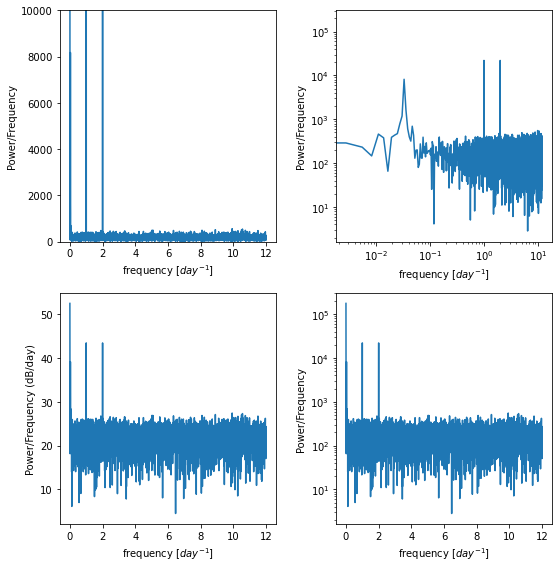

In [18]:
f, ax = plt.subplots(2,2,figsize=(8,8))
ax[0,0].plot(fwin,p_mean)
ax[0,0].set_ylim((0,10000)) # zoom in on the y axis
ax[0,0].set_ylabel('Power/Frequency')
ax[0,0].set_xlabel('frequency [$day^{-1}$]')

ax[0,1].plot(fwin,p_mean)
ax[0,1].set_xscale('log')
ax[0,1].set_yscale('log')
ax[0,1].set_ylabel('Power/Frequency')
ax[0,1].set_xlabel('frequency [$day^{-1}$]')


ax[1,0].plot(fwin,10*np.log10(p_mean))
ax[1,0].set_ylabel('Power/Frequency (dB/day)')
ax[1,0].set_xlabel('frequency [$day^{-1}$]')

ax[1,1].plot(fwin,p_mean)
ax[1,1].set_yscale('log')
ax[1,1].set_ylabel('Power/Frequency')
ax[1,1].set_xlabel('frequency [$day^{-1}$]')

plt.tight_layout()

## Response:
The Fourier series analysis appears to show a sub-diurnal frequency in groundwater level changes that appears every 12 hours. Additionally, the entire dataset has max and min peaks on the order of a month. These frequencies would match well with a location that has a tidally influenced groundwater table at a location close to the coast, or some tidal body of water. The frequency of tidal changes is on the order of 12 hours, and one would see changes to the water table depending on the tide. At flood tide, the groundwater table moves up and the opposite occurs when the tide is ebbing. I actually witnessed this effect very often when groundwater sampling at locations in and around the SF Bay Area. Water levels would change over foot throughout the day!

## References 
- Reference 1: https://stackoverflow.com/questions/14313510/how-to-calculate-rolling-moving-average-using-python-numpy-scipy
- Lab 8-1: https://mountain-hydrology-research-group.github.io/data-analysis/modules/lab8/lab8-1.ipynb
- Lab 8-2: https://mountain-hydrology-research-group.github.io/data-analysis/modules/lab8/lab8-2.ipynb